In [28]:
import sqlite3
import os
import matplotlib.pyplot as plt
conn = sqlite3.connect(os.path.abspath('final.db'))
cur = conn.cursor()


In [ ]:
# Visualization 1
# date from WeeklyEconomicIndex
cur.execute("SELECT date FROM WeeklyEconomicIndex")
date_data = cur.fetchall()

import datetime
date_ls = []
for i in date_data:
    date = i[0]
    date_ls.append(datetime.datetime.strptime(date, "%Y-%m-%d"))

In [30]:
# weekly economic index from WeeklyEconomicIndex
cur.execute("SELECT index_value FROM WeeklyEconomicIndex")
ls = cur.fetchall()
index_data_ls = []
for i in ls:
    index = i[0]
    index_data_ls.append(index)

ValueError: x and y must have same first dimension, but have shapes (5891,) and (883,)

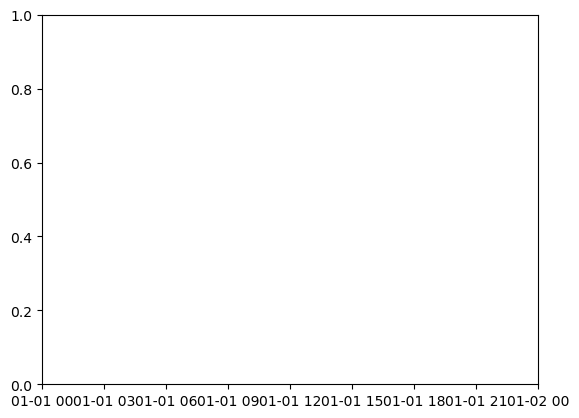

In [45]:
# plt.plot(date_ls, index_data_ls)
# COVID
percentage_growth = []
percentage_growth.append(0)
for i in range(1, len(index_data_ls)):
    if index_data_ls[i - 1] == 0:
        growth = None
    else:
        growth = ((index_data_ls[i] - index_data_ls[i - 1]) / index_data_ls[i - 1]) * 100
    percentage_growth.append(growth)
plt.plot(date_ls, percentage_growth)

In [39]:
# Visualization 2
# date from WeeklyPrices
cur.execute("SELECT date FROM WeeklyPrices")
date_data = cur.fetchall()

import datetime
date_ls = []
for i in date_data:
    date = i[0]
    date_ls.append(datetime.datetime.strptime(date, "%Y-%m-%d"))

In [ ]:
# weekly economic index from WeeklyPrices
cur.execute("SELECT index_value FROM WeeklyPrices")
ls = cur.fetchall()
index_data_ls = []
for i in ls:
    index = i[0]
    index_data_ls.append(index)

In [ ]:
# Visualization 3